<a href="https://colab.research.google.com/github/LuisCBo/prueba/blob/main/CNN_Zoo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Se importan las librerias
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Crear carpetas de imagenes de entranamiento
!mkdir leon
!mkdir jirafa
!mkdir elefante
!mkdir tucan
!mkdir cebra
!mkdir pinguino
!mkdir hipopotamo
!mkdir avestruz
!mkdir oso
!mkdir tortuga

In [4]:
%cd cebra
!unzip cebra.zip
%cd ..

%cd elefante
!unzip elefante.zip
%cd ..

%cd jirafa
!unzip jirafa.zip
%cd ..

%cd leon
!unzip leon.zip
%cd ..

%cd tucan
!unzip tucan.zip
%cd ..

/content/cebra
Archive:  cebra.zip
  inflating: images (14).jpeg        
  inflating: images (15).jpeg        
  inflating: images (16).jpeg        
  inflating: images (17).jpeg        
  inflating: images (18).jpeg        
  inflating: images (19).jpeg        
  inflating: images (21).jpeg        
  inflating: images (22).jpeg        
  inflating: images (23).jpeg        
  inflating: images (24).jpeg        
  inflating: images (26).jpeg        
  inflating: images (27).jpeg        
  inflating: images (28).jpeg        
  inflating: images (30).jpeg        
  inflating: images (32).jpeg        
  inflating: images (33).jpeg        
  inflating: images (34).jpeg        
  inflating: images (35).jpeg        
  inflating: images (36).jpeg        
  inflating: images (37).jpeg        
  inflating: images (39).jpeg        
  inflating: images (40).jpeg        
  inflating: images (41).jpeg        
  inflating: images (42).jpeg        
  inflating: images (43).jpeg        
  inflating: im

In [5]:
%cd pinguino
!unzip pinguino.zip
%cd ..

%cd hipopotamo
!unzip hipopotamo.zip
%cd ..

%cd avestruz
!unzip avestruz.zip
%cd ..

%cd oso
!unzip oso.zip
%cd ..

%cd tortuga
!unzip tortuga.zip
%cd ..

/content/pinguino
Archive:  pinguino.zip
  inflating: images (4).jpeg         
  inflating: images (5).jpeg         
  inflating: images (9).jpeg         
  inflating: images (10).jpeg        
  inflating: images (11).jpeg        
  inflating: images (12).jpeg        
  inflating: images (13).jpeg        
  inflating: images (14).jpeg        
  inflating: images (15).jpeg        
  inflating: images (17).jpeg        
  inflating: images (18).jpeg        
  inflating: images (19).jpeg        
  inflating: images (20).jpeg        
  inflating: images (23).jpeg        
  inflating: images (24).jpeg        
  inflating: images (25).jpeg        
  inflating: images (26).jpeg        
  inflating: images (27).jpeg        
  inflating: images (29).jpeg        
  inflating: images (30).jpeg        
  inflating: images (31).jpeg        
  inflating: images (32).jpeg        
  inflating: images (33).jpeg        
  inflating: images (34).jpeg        
  inflating: images (35).jpeg        
  inflati

In [6]:
%cd avestruz
!unzip Avestruz.zip
%cd ..

/content/avestruz
Archive:  Avestruz.zip
  inflating: images (26).jpeg        
  inflating: images (28).jpeg        
  inflating: images (29).jpeg        
  inflating: images (30).jpeg        
  inflating: images (38).jpeg        
  inflating: images (40).jpeg        
  inflating: images (43).jpeg        
  inflating: images (46).jpeg        
  inflating: images (47).jpeg        
  inflating: images (48).jpeg        
  inflating: images (50).jpeg        
  inflating: images (51).jpeg        
  inflating: images (53).jpeg        
  inflating: images (54).jpeg        
  inflating: images (55).jpeg        
  inflating: images (57).jpeg        
  inflating: images (58).jpeg        
  inflating: images (60).jpeg        
  inflating: images (66).jpeg        
  inflating: images (69).jpeg        
  inflating: images (70).jpeg        
  inflating: images (72).jpeg        
  inflating: images (73).jpeg        
  inflating: images (75).jpeg        
  inflating: images (76).jpeg        
  inflati

In [7]:
# Borrar los archivos zip
!rm -rf /content/cebra/cebra.zip
!rm -rf /content/elefante/elefante.zip
!rm -rf /content/jirafa/jirafa.zip
!rm -rf /content/leon/leon.zip
!rm -rf /content/tucan/tucan.zip

!rm -rf /content/avestruz/Avestruz.zip
!rm -rf /content/hipopotamo/hipopotamo.zip
!rm -rf /content/oso/oso.zip
!rm -rf /content/pinguino/pinguino.zip
!rm -rf /content/tortuga/tortuga.zip

In [8]:
# Cuantas imagenes hay de cada animal
!ls /content/cebra | wc -l #106
!ls /content/elefante | wc -l #102
!ls /content/jirafa | wc -l #130
!ls /content/leon | wc -l #102
!ls /content/tucan | wc -l #110

!ls /content/avestruz | wc -l #102
!ls /content/hipopotamo | wc -l #116
!ls /content/oso | wc -l #132
!ls /content/pinguino | wc -l #109
!ls /content/tortuga | wc -l #144

106
102
130
102
110
102
116
132
109
144


In [9]:
# Crear el dataset
!mkdir dataset
!mkdir dataset/leon
!mkdir dataset/jirafa
!mkdir dataset/elefante
!mkdir dataset/tucan
!mkdir dataset/cebra

!mkdir dataset/avestruz
!mkdir dataset/hipopotamo
!mkdir dataset/oso
!mkdir dataset/pinguino
!mkdir dataset/tortuga

In [10]:
# Copiar las imagenes al dataset y pasar solo 100 imagenes
import shutil
import os
carpeta_fuente = '/content/cebra'
carpeta_destino = '/content/dataset/cebra'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 100: #100 es el número de imagenes que se van a copiar
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [12]:
# Copiar las imagenes al dataset y pasar solo 100 imagenes
import shutil
import os
carpeta_fuente = '/content/elefante'
carpeta_destino = '/content/dataset/elefante'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 100: #100 es el número de imagenes que se van a copiar
    # Verificar si es un archivo antes de copiarlo
    if os.path.isfile(os.path.join(carpeta_fuente, nombreimg)):
      shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [13]:
# Copiar las imagenes al dataset y pasar solo 100 imagenes
import shutil
import os
carpeta_fuente = '/content/jirafa'
carpeta_destino = '/content/dataset/jirafa'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 100: #100 es el número de imagenes que se van a copiar
    # Verificar si es un archivo antes de copiarlo
    if os.path.isfile(os.path.join(carpeta_fuente, nombreimg)):
      shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [14]:
# Copiar las imagenes al dataset y pasar solo 100 imagenes
import shutil
import os
carpeta_fuente = '/content/leon'
carpeta_destino = '/content/dataset/leon'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 100: #100 es el número de imagenes que se van a copiar
    # Verificar si es un archivo antes de copiarlo
    if os.path.isfile(os.path.join(carpeta_fuente, nombreimg)):
      shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [15]:
# Copiar las imagenes al dataset y pasar solo 100 imagenes
import shutil
import os
carpeta_fuente = '/content/tucan'
carpeta_destino = '/content/dataset/tucan'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 100: #100 es el número de imagenes que se van a copiar
    # Verificar si es un archivo antes de copiarlo
    if os.path.isfile(os.path.join(carpeta_fuente, nombreimg)):
      shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [16]:
# Copiar las imagenes al dataset y pasar solo 100 imagenes
import shutil
import os
carpeta_fuente = '/content/avestruz'
carpeta_destino = '/content/dataset/avestruz'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 100: #100 es el número de imagenes que se van a copiar
    # Verificar si es un archivo antes de copiarlo
    if os.path.isfile(os.path.join(carpeta_fuente, nombreimg)):
      shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [17]:
# Copiar las imagenes al dataset y pasar solo 100 imagenes
import shutil
import os
carpeta_fuente = '/content/hipopotamo'
carpeta_destino = '/content/dataset/hipopotamo'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 100: #100 es el número de imagenes que se van a copiar
    # Verificar si es un archivo antes de copiarlo
    if os.path.isfile(os.path.join(carpeta_fuente, nombreimg)):
      shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [18]:
# Copiar las imagenes al dataset y pasar solo 100 imagenes
import shutil
import os
carpeta_fuente = '/content/oso'
carpeta_destino = '/content/dataset/oso'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 100: #100 es el número de imagenes que se van a copiar
    # Verificar si es un archivo antes de copiarlo
    if os.path.isfile(os.path.join(carpeta_fuente, nombreimg)):
      shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [19]:
# Copiar las imagenes al dataset y pasar solo 100 imagenes
import shutil
import os
carpeta_fuente = '/content/pinguino'
carpeta_destino = '/content/dataset/pinguino'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 100: #100 es el número de imagenes que se van a copiar
    # Verificar si es un archivo antes de copiarlo
    if os.path.isfile(os.path.join(carpeta_fuente, nombreimg)):
      shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [20]:
# Copiar las imagenes al dataset y pasar solo 100 imagenes
import shutil
import os
carpeta_fuente = '/content/tortuga'
carpeta_destino = '/content/dataset/tortuga'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 100: #100 es el número de imagenes que se van a copiar
    # Verificar si es un archivo antes de copiarlo
    if os.path.isfile(os.path.join(carpeta_fuente, nombreimg)):
      shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [24]:
# Cuantas imagenes hay de cada animal
!ls /content/dataset/cebra | wc -l #100
!ls /content/dataset/elefante | wc -l #100
!ls /content/dataset/jirafa | wc -l #100
!ls /content/dataset/leon | wc -l #100
!ls /content/dataset/tucan | wc -l #100

!ls /content/dataset/avestruz | wc -l #100
!ls /content/dataset/hipopotamo | wc -l #100
!ls /content/dataset/oso | wc -l #100
!ls /content/dataset/pinguino | wc -l #100
!ls /content/dataset/tortuga | wc -l #100

100
100
100
100
100
100
100
100
100
100


Found 849 images belonging to 10 classes.
Found 148 images belonging to 10 classes.


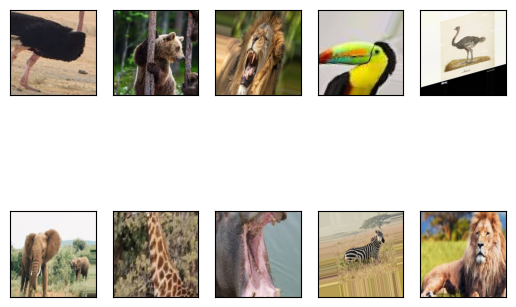

In [25]:
# Aumento de datos con ImageDataGenerator usando keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Crear el generador de datos con el aumento de zoom
datagen = ImageDataGenerator(
    rescale= 1. / 255,
    rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 15,
    zoom_range = [0.5, 1.5],
    validation_split=0.15 # 15% para pruebas
    )

# Generadores para sets de entrenamiento y pruebas
data_gen_entrenamiento = datagen.flow_from_directory('/content/dataset', target_size=(224, 224),
                                                     batch_size = 32, shuffle=True, subset='training')
data_gen_pruebas = datagen.flow_from_directory('/content/dataset', target_size=(224, 224),
                                                     batch_size = 32, shuffle=True, subset='validation')

# Imprimir 10 imagenes del generador de entrenamiento
for imagen, etiqueta in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()

In [27]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Cargar el modelo preentrenado MobileNetV2 de Keras y excluir la parte superior (top)
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Congelar las capas base del modelo preentrenado
base_model.trainable = False

# Crear el modelo funcional
inputs = tf.keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)  # Añadir una capa de pooling global
outputs = Dense(10, activation='softmax')(x)  # Añadir la capa densa con 10 neuronas

modelo = Model(inputs, outputs)

# Compilar el modelo
modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Mostrar el resumen del modelo
modelo.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,270,794 (8.66 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [28]:
# Copilar el modelo
modelo.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [29]:
# Entrenar el modelo
EPOCAS = 5
historial = modelo.fit(
    data_gen_entrenamiento, epochs = EPOCAS, batch_size = 32,
    validation_data = data_gen_pruebas
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.3051 - loss: 2.0755 - val_accuracy: 0.8581 - val_loss: 0.7387
Epoch 2/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.7887 - loss: 0.7714 - val_accuracy: 0.9122 - val_loss: 0.3863
Epoch 3/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.9099 - loss: 0.4051 - val_accuracy: 0.9054 - val_loss: 0.2967
Epoch 4/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.9135 - loss: 0.2989 - val_accuracy: 0.9324 - val_loss: 0.2584
Epoch 5/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.9147 - loss: 0.2889 - val_accuracy: 0.9595 - val_loss: 0.1936


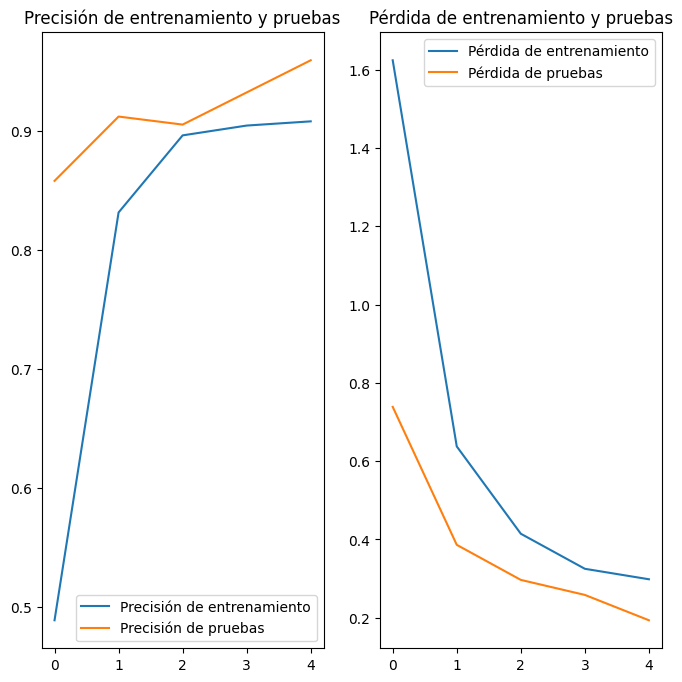

In [31]:
# Gráficas de precisión
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(5)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(rango_epocas, acc, label = 'Precisión de entrenamiento')
plt.plot(rango_epocas, val_acc, label = 'Precisión de pruebas')
plt.legend(loc = 'lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1, 2, 2)
plt.plot(rango_epocas, loss, label = 'Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label = 'Pérdida de pruebas')
plt.legend(loc = 'upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step


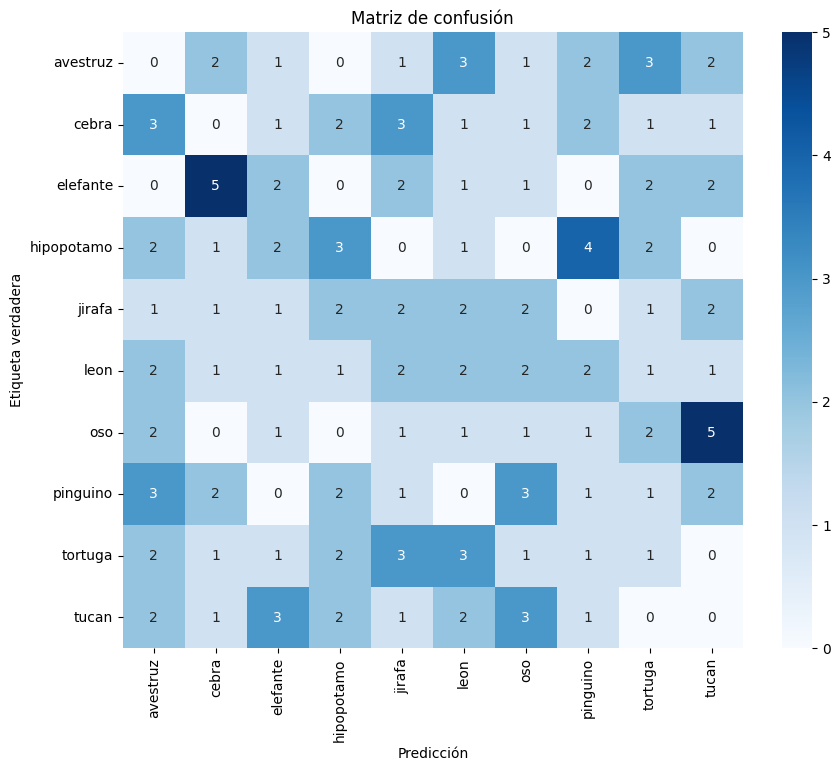

In [38]:
# Matriz de confusión
# Obtener las predicciones del modelo
predicciones = modelo.predict(data_gen_pruebas)

# Obtener las etiquetas verdaderas
etiquetas_verdaderas = data_gen_pruebas.classes

# Crear la matriz de confusión
matriz_confusion = confusion_matrix(etiquetas_verdaderas, np.argmax(predicciones, axis=1))

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))  # Ajusta el tamaño de la figura si es necesario
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=data_gen_entrenamiento.class_indices,
            yticklabels=data_gen_entrenamiento.class_indices)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de confusión')
plt.show()

In [33]:
import requests
from PIL import Image
from io import BytesIO
import numpy as np
import tensorflow as tf
import cv2

def categorizar(url):
    # Descargar la imagen desde la URL
    respuesta = requests.get(url)
    img = Image.open(BytesIO(respuesta.content)).convert('RGB')

    # Redimensionar la imagen a (224, 224)
    img = img.resize((224, 224))
    img = np.array(img).astype(float) / 255.0

    # Añadir una dimensión adicional para el lote
    img = np.expand_dims(img, axis=0)

    # Realizar la predicción
    prediccion = modelo.predict(img)
    class_id = np.argmax(prediccion[0], axis=-1)

    return class_id

# Prueba con una URL de un Tucan
#url = 'https://upload.wikimedia.org/wikipedia/commons/a/a4/Ramphastos_toco_-Birdworld%2C_Farnham%2C_Surrey%2C_England-8a.jpg'
url = 'https://www.infoescola.com/wp-content/uploads/2016/09/avestruz-233939020.jpg'
prediccion = categorizar(url)
print(prediccion)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
0


In [37]:
import requests
from PIL import Image
from io import BytesIO
import numpy as np
import tensorflow as tf
import cv2
# Prueba con url

# 0 - avestruz
# 1 - cebra
# 2 - elefante
# 3 - hipopotamo
# 4 - jirafa
# 5 - leon
# 6 - oso
# 7 - pinguino
# 8 - tortuga
# 9 - tucan

# Leon - url = 'https://th.bing.com/th/id/R.d96c99d6009527af0b650228314ba356?rik=X2Jev56MgQ8s%2fw&riu=http%3a%2f%2fwww.fondosanimales.com%2fImagenes%2fleon-salvaje.jpg&ehk=N4XyGiv8KXOFR5MUc9l1JJ2ImXFB0pd7XIARCF93ebY%3d&risl=&pid=ImgRaw&r=0'
# Cebra - url = 'https://www.ciudad17.com/Naturaleza/wp-content/uploads/cebra.jpg'
# Jirafa - url = 'https://cdn0.expertoanimal.com/es/posts/3/7/5/tipos_de_jirafas_24573_600.jpg'
# Elefante - url = 'https://files.worldwildlife.org/wwfcmsprod/images/African_Elephant_Walking/story_carousel/3arzfzjsw0_Medium_WW1113482.jpg'
# Tucan - url = 'https://upload.wikimedia.org/wikipedia/commons/a/a4/Ramphastos_toco_-Birdworld%2C_Farnham%2C_Surrey%2C_England-8a.jpg'
# Avestruz - url = 'https://www.infoescola.com/wp-content/uploads/2016/09/avestruz-233939020.jpg'
# Hipopotamo - url = 'https://th.bing.com/th/id/R.6b02f6d6dd4c46b8dc0b5dc5d0e6e238?rik=HDlKynIM1UEKOg&riu=http%3a%2f%2fwww.gtush.com%2fwp-content%2fuploads%2f2018%2f06%2fhipopotamo-portada.jpg&ehk=Fw%2bg7qXc0Lu4VQ54qawPvOm6hcWlM4FRpns3IvZRifo%3d&risl=&pid=ImgRaw&r=0'
# Pinguino - url = 'https://th.bing.com/th/id/R.ba636c0b18ec647836660f0948675b7d?rik=bKNPFhmzpq6MLg&riu=http%3a%2f%2fwww.fotosanimales.es%2fwp-content%2fuploads%2f2017%2f12%2fpinguino.jpg&ehk=Iggac7g6sjKZyVTAITr9TG1qEgfDGLgWH15Z3ZxF7Jw%3d&risl=&pid=ImgRaw&r=0'
# Tortuga - url = 'https://concepto.de/wp-content/uploads/2020/04/tortuga-e1588195744955.jpg'
# Oso -
url = 'https://curiosfera-animales.com/wp-content/uploads/2016/10/Caracter%C3%ADsticas-del-oso.jpg'


prediccion = categorizar(url)

if prediccion == 0:
  prediccion = "El animal detectado es una Avestruz - El avestruz (Struthio camelus) es el ave más grande del mundo y una de las más veloces en tierra. Aunque no puede volar, sus poderosas patas le permiten alcanzar velocidades de hasta 70 km/h. Se encuentra principalmente en África y puede llegar a medir hasta 3 metros de altura y pesar 180 kg"
if prediccion == 1:
  prediccion = "El animal detectado es una Cebra - La cebra (Equus) es un mamífero de la familia de los équidos, famoso por su distintivo pelaje de rayas blancas y negras. Existen tres especies principales"
if prediccion == 2:
  prediccion = "El animal detectado es un Elefante - El elefante (Elephantidae) es el mamífero terrestre más grande del mundo, con especies que pueden llegar a pesar hasta 7.500 kg y medir más de 3 metros de altura"
if prediccion == 3:
  prediccion = "El animal detectado es un Hipopotamo - El hipopótamo (Hippopotamus amphibius) es un mamífero semiacuático originario del África subsahariana. A pesar de su apariencia robusta, puede correr hasta 30 km/h en distancias cortas. Su nombre proviene del griego hippos ('caballo') y potamos ('río'), aunque está más emparentado con ballenas y delfines que con los caballos"
if prediccion == 4:
  prediccion = "El animal detectado es una Jirafa - La jirafa (Giraffa camelopardalis) es el mamífero terrestre más alto del mundo, alcanzando hasta 5,7 metros de altura y un peso de 750 a 1.600 kg. Su largo cuello le permite alimentarse de hojas inaccesibles para otros herbívoros, especialmente de acacias"
if prediccion == 5:
  prediccion = "El animal detectado es un León - El león (Panthera leo) es un mamífero carnívoro de la familia de los félidos y uno de los depredadores más icónicos del mundo. Es conocido por su melena imponente, su fuerza y su vida en manada, lo que lo diferencia de otros grandes felinos"
if prediccion == 6:
  prediccion = "El animal detectado es un Oso - El oso pertenece a la familia Ursidae y es un mamífero omnívoro de gran tamaño, con una distribución que abarca América, Europa y Asia. Existen ocho especies de osos, entre ellas el oso pardo, el oso polar, el oso negro americano, el oso negro asiático, el oso malayo, el oso bezudo, el oso de anteojos y el oso panda"
if prediccion == 7:
  prediccion = "El animal detectado es un Pinguino - El pingüino (Spheniscidae) es un ave marina no voladora, adaptada perfectamente para la vida acuática. Se encuentra principalmente en el hemisferio sur, desde la Antártida hasta regiones más templadas como las costas de Sudamérica, África y Oceanía"
if prediccion == 8:
  prediccion = "El animal detectado es un Tortuga - La tortuga es un reptil del orden de los quelonios, caracterizado por su caparazón resistente, que protege sus órganos internos y crece junto con el animal. Existen tortugas terrestres y acuáticas, adaptadas a distintos hábitats en todo el mundo"
if prediccion == 9:
  prediccion = "El animal detectado es un Tucán - El tucán (Ramphastidae) es un ave tropical famosa por su pico grande y colorido, que puede medir hasta un tercio de su cuerpo. Se encuentra en bosques y selvas de América, desde México hasta Argentina"
print(prediccion)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
El animal detectado es un Oso - El oso pertenece a la familia Ursidae y es un mamífero omnívoro de gran tamaño, con una distribución que abarca América, Europa y Asia. Existen ocho especies de osos, entre ellas el oso pardo, el oso polar, el oso negro americano, el oso negro asiático, el oso malayo, el oso bezudo, el oso de anteojos y el oso panda
